In [11]:
import hashlib
import os

# 이미지가 저장된 디렉토리 경로 설정
image_dir = 'data/horse-or-human'  # 이미지 파일이 있는 경로
# 이미지 파일 리스트 생성
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png', '.jpeg'))]

def hash_image(image_path):
    with open(image_path, "rb") as f:
        img_hash = hashlib.md5(f.read()).hexdigest()  # MD5 해시 계산
    return img_hash

image_hashes = {}
duplicate_images = []

for img_file in image_files:
    img_hash = hash_image(img_file)
    if img_hash in image_hashes:
        duplicate_images.append(img_file)  # 중복된 이미지 기록
    else:
        image_hashes[img_hash] = img_file

# 중복된 이미지 개수 출력
print(f'중복된 이미지 개수: {len(duplicate_images)}')


중복된 이미지 개수: 0


이미지 로드 성공: data/horse-or-human/train\horses\horse01-0.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-1.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-2.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-3.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-4.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-5.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-6.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-7.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-8.png
이미지 로드 성공: data/horse-or-human/train\horses\horse01-9.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-0.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-1.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-2.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-3.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-4.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-5.png
이미지 로드 성공: data/horse-or-human/train\horses\horse02-6.png
이미지 로드 성공: dat

SystemError: error return without exception set

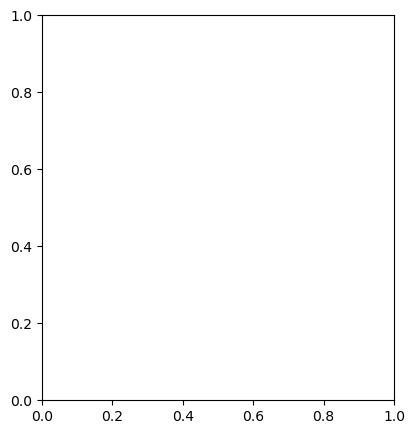

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 이미지 파일 경로 리스트 생성
image_dir = 'data/horse-or-human/train'
image_files = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

def plot_brightness_and_contrast(image_files):
    brightness_values = []
    contrast_values = []

    for img_file in image_files:
        # 이미지 불러오기 및 회색조로 변환
        img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"이미지 로드 실패: {img_file}")
            continue
        else:
            print(f"이미지 로드 성공: {img_file}")

        # 밝기 값을 1차원 배열로 변환하여 저장
        brightness_values.extend(img.flatten())

        # 명암 대비 계산 (최대값 - 최소값)
        contrast = img.max() - img.min()
        contrast_values.append(contrast)

    # 밝기 히스토그램
    if brightness_values:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.hist(brightness_values, bins=50, range=(0, 255), color='gray')
        plt.title('Brightness Distribution', fontsize='15', fontweight='bold')
        plt.xlabel('Brightness (0: Black, 255: White)', fontsize='10')
        plt.ylabel('Frequency', fontsize='10')

        # 명암 대비 히스토그램
        plt.subplot(1, 2, 2)
        plt.hist(contrast_values, bins=50, color='blue')
        plt.title('Contrast Distribution', fontsize='15', fontweight='bold')
        plt.xlabel('Contrast (Max Brightness - Min Brightness)', fontsize='10')
        plt.ylabel('Frequency', fontsize='10')

        plt.tight_layout()
        plt.show()
    else:
        print("밝기 값을 추출할 유효한 이미지가 없습니다.")

# 함수 실행
plot_brightness_and_contrast(image_files)
